### Import Libraries

In [271]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### Load Dataset

In [176]:
# df => Dataframe
df = pd.read_excel("./CSV_Files/T2_dataset.xlsx")
X = df.iloc[:, :2]  #also use [:, :-1]
y = df.iloc[:, 2]
df.head()

,YearsExperience,Salary,Accept the job
0,1.1,39343.0,Yes
1,1.3,46205.0,No
2,1.5,37731.0,Yes
3,2.0,43525.0,Yes
4,2.2,39891.0,Yes


### Preprocessing

In [65]:
check1 = df.duplicated().any()
print("Check Duplicate Values:", check1)

Check Duplicate Values: False


In [4]:
df.tail()

,YearsExperience,Salary,Accept the job
25,9.0,105582.0,Yes
26,9.5,116969.0,Yes
27,NaN,112635.0,Yes
28,10.3,122391.0,No
29,10.5,121872.0,No


#### Check Null values

In [5]:
df.isnull().sum()

YearsExperience    2
Salary             2
Accept the job     0
dtype: int64

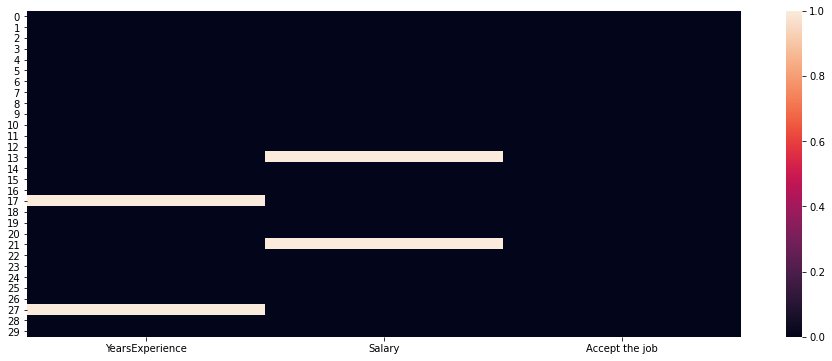

In [9]:
plt.figure(figsize=(16,6))
sns.heatmap(df.isnull())
plt.show()

#### Missing Data using sklearn also use fillna() function

In [178]:
imputer=SimpleImputer(missing_values=np.NAN, strategy='mean', verbose=0)
imputer=imputer.fit(X.values[:,0:2])
X.values[:,0:]=imputer.transform(X.values[:,0:2])

#### Check again to see missing values are present or not

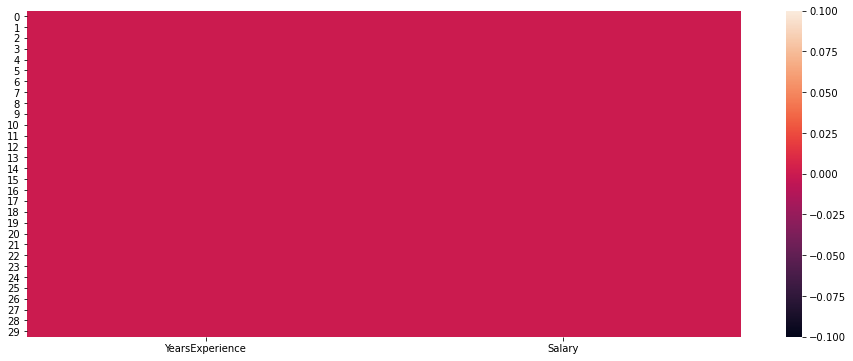

In [179]:
plt.figure(figsize=(16,6))
sns.heatmap(X.isnull())
plt.show()

#### Target Feature contain yes or no i'll change into 1 or 0 (Note no need for encording)

In [183]:
y = y.map(dict(Yes=1, No=0))

In [184]:
y.dtype

dtype('int64')

In [185]:
y.unique()

array([1, 0], dtype=int64)

In [186]:
y.value_counts()

0    17
1    13
Name: Accept the job, dtype: int64

#### Plotting Graphs

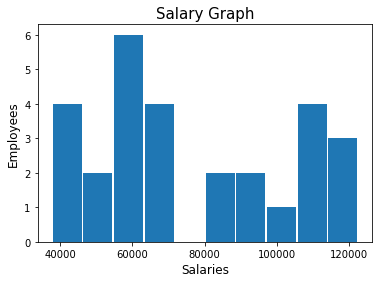

In [60]:
plt.hist(X['Salary'], rwidth=0.95)
plt.title("Salary Graph",fontsize=15)
plt.xlabel("Salaries",fontsize=12)
plt.ylabel("Employees",fontsize=12)
plt.show()

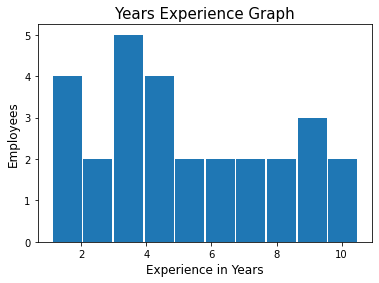

In [61]:
plt.hist(X['YearsExperience'], rwidth=0.95)
plt.title("Years Experience Graph",fontsize=15)
plt.xlabel("Experience in Years",fontsize=12)
plt.ylabel("Employees",fontsize=12)
plt.show()

#### Checking the co-relation between indepandant features (Note: Both the features are depend on each other you use one feature if you can) 

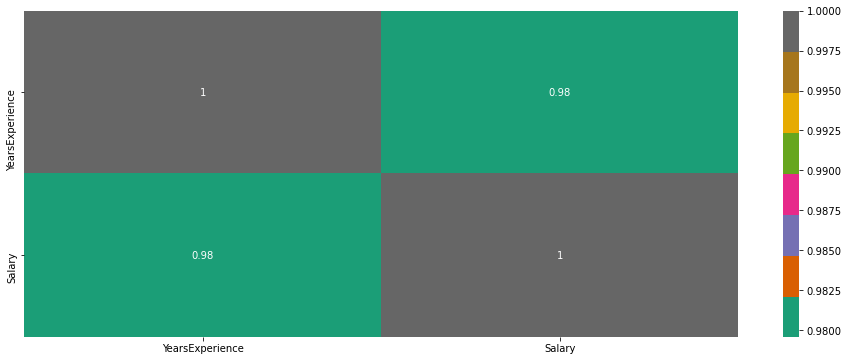

In [72]:
plt.figure(figsize=(16,6))
sns.heatmap(X.corr(), annot=True, cmap=plt.cm.Dark2)
plt.show()

#### Split data into Four Parts

In [259]:
X_train,X_test,y_train,y_test=train_test_split(X.values,y.values,test_size=0.2, random_state=51)

In [260]:
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

##### 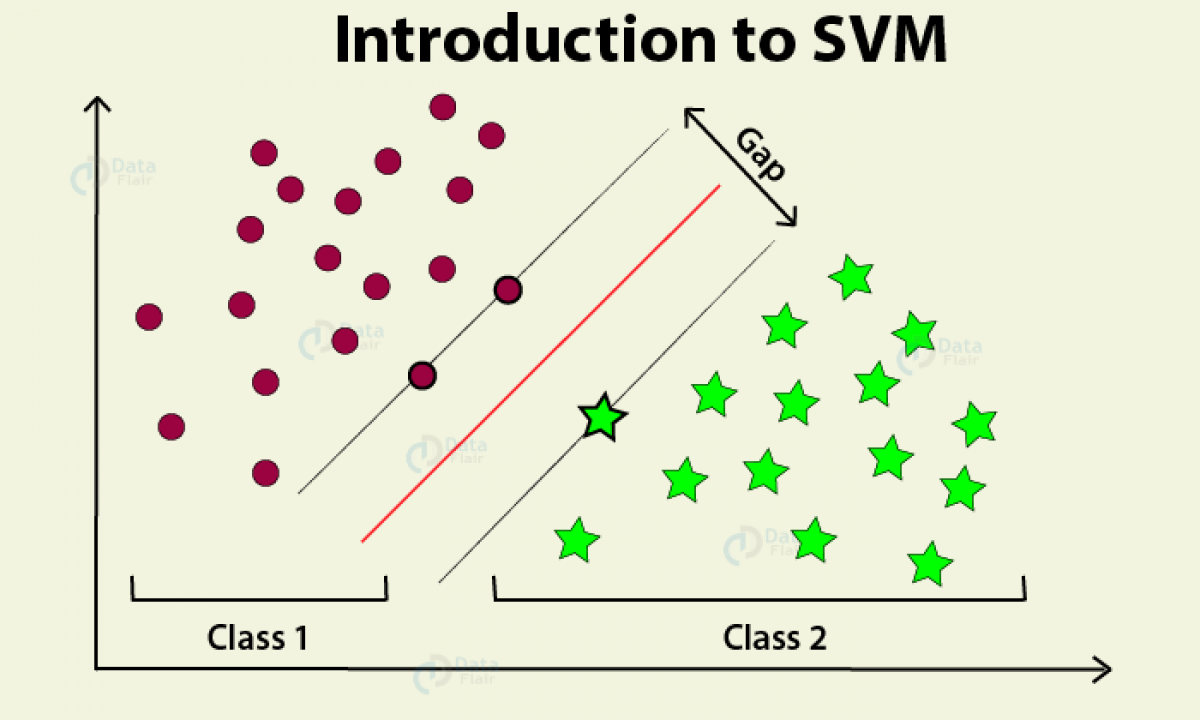

In [261]:
from sklearn import svm
model_svm = svm.SVC()
model_svm.fit(X_train,y_train)
# accuracy on training data
X_train_prediction = model_svm.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.625


In [262]:
# accuracy on test data
X_test_prediction = model_svm.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.8333333333333334


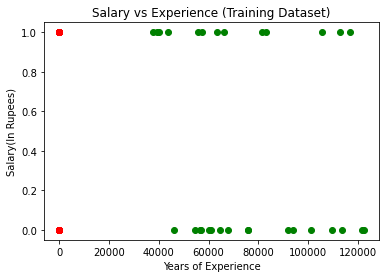

In [270]:
plt.scatter(X["Salary"],y, color="green")
plt.scatter(X["YearsExperience"],y, color="red")   
plt.title("Salary vs Experience (Training Dataset)")  
plt.xlabel("Years of Experience")  
plt.ylabel("Salary(In Rupees)")  
plt.show()

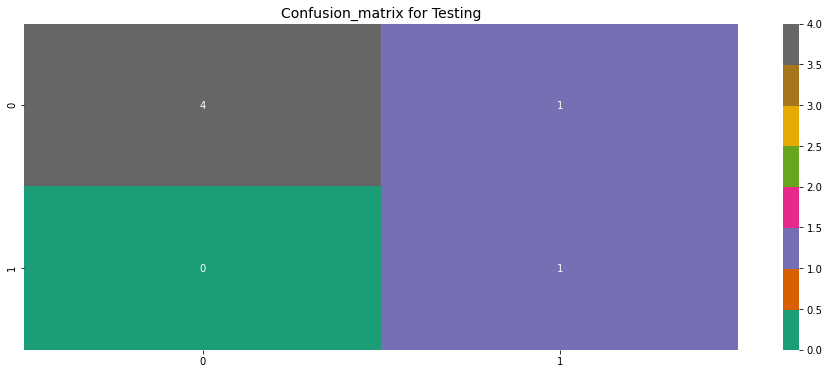

In [282]:
plt.figure(figsize=(16,6))
sns.heatmap(confusion_matrix(X_test_prediction, y_test),annot=True, cmap=plt.cm.Dark2)
plt.title("Confusion_matrix for Testing", fontsize=14)
plt.show()

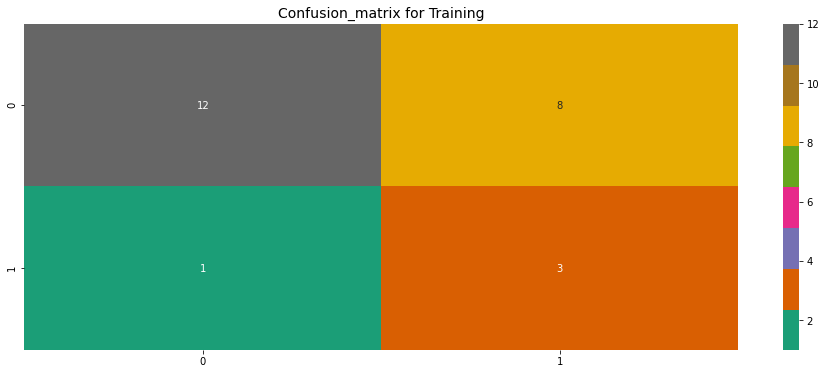

In [281]:
plt.figure(figsize=(16,6))
sns.heatmap(confusion_matrix(X_train_prediction, y_train),annot=True, cmap=plt.cm.Dark2)
plt.title("Confusion_matrix for Training", fontsize=14)
plt.show()